In [4]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 



In [5]:
from tensorflow.examples.tutorials.mnist import input_data # import data from tensorflow library 

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # downloading data and generating onehot 
                                                               #encoded labels

Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
# number of features 
input_features = 784
# number of target labels 
classes = 10
# learning rate  
learning_rate = 0.01
# batch size 
batch_size = 100
# number of epochs 
epochs = 4000

# input data 
Xtrain = mnist.train.images # training data features (Images)
Ytrain = mnist.train.labels # Label class for training image
Xtest = mnist.test.images   # Testing data
Ytest = mnist.test.labels   # Testing Class label
Xval = mnist.validation.images # Validation data
Yval = mnist.validation.labels # Validation class label


graph = tf.Graph()  # initialization for tensorflow graph  

with graph.as_default(): #Defining the Graph
  

    # Input Nodes
    tf_Xtrain = tf.placeholder(tf.float32, shape=(None, input_features)) # Iterateable graph input for features
    tf_Ytrain = tf.placeholder(tf.float32, shape=(None, classes)) # Iterateable graph input for Label
    tf_Xval = tf.constant(Xval) # graph input for  Vlaidation features
    tf_Xtest = tf.constant(Xtest) # graph input for  Vlaidation labels

    # Variables. 
    # parameters to be trained
    weights = tf.Variable(0.1 * np.random.randn(784, 10).astype(np.float32)) # Random intialization of weights
                                                                             # with shape
    biases = tf.Variable(0.1 * np.random.randn(10).astype(np.float32))# Random intialization of Bias with shape
    
    # Defining Model
    def layer(data):
        return tf.matmul(data, weights) + biases # Implementing Y= WX+b
    
    # Training computation. 
    pred = layer(tf_Xtrain) # Linking the input to Model and predict the output
    
    #cost function to reduce the difference between prediction and ground truth
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_Ytrain, logits=pred)) 

    # Optimizer. 
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 

    # Predictions for the training, validation, and test data. 
    train_prediction = tf.nn.softmax(pred) #Applying softmax to prediction
    valid_prediction = tf.nn.softmax(tf.matmul(tf_Xval, weights) + biases)#Applying softmax to 
                                                                          #val_prediction 
    test_prediction = tf.nn.softmax(tf.matmul(tf_Xtest, weights) + biases)#Applying softmax to 
                                                                          #test_prediction


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [7]:
#Function to calculate accuracy 
def accuracy(predictions, labels):
    #It calculates position of max in each row and see if it is the same as ground truth
    # If it is same, the one value is added and if not zero is added, based on number of sample used
    # percentage accuracy is calculted 
    return ((100*np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)))/predictions.shape[0])



Initialized
Minibatch loss at step 0: 2.51877760887146
Minibatch accuracy: 14.0%
Validation accuracy: 8.4%
Minibatch loss at step 400: 0.9540807604789734
Minibatch accuracy: 78.0%
Validation accuracy: 77.1%
Minibatch loss at step 800: 0.6478277444839478
Minibatch accuracy: 88.0%
Validation accuracy: 83.5%
Minibatch loss at step 1200: 0.5504278540611267
Minibatch accuracy: 84.0%
Validation accuracy: 85.5%
Minibatch loss at step 1600: 0.6077272295951843
Minibatch accuracy: 86.0%
Validation accuracy: 86.6%
Minibatch loss at step 2000: 0.41718295216560364
Minibatch accuracy: 91.0%
Validation accuracy: 87.2%
Minibatch loss at step 2400: 0.6477197408676147
Minibatch accuracy: 79.0%
Validation accuracy: 87.8%
Minibatch loss at step 2800: 0.5847758650779724
Minibatch accuracy: 83.0%
Validation accuracy: 88.4%
Minibatch loss at step 3200: 0.33999738097190857
Minibatch accuracy: 90.0%
Validation accuracy: 88.6%
Minibatch loss at step 3600: 0.5566169619560242
Minibatch accuracy: 82.0%
Validation 

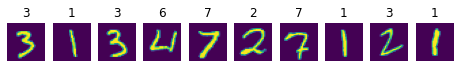

In [8]:
cost=[] # list variable for further use loss
acc=[]  # list variable for further use accuracy
with tf.Session(graph=graph) as sess: # Starting the process
    
    sess.run(tf.global_variables_initializer()) # # initialize weights, biases and inputs (all variables) 
    print("Initialized") 

    for step in range(epochs): # No of steps to be taken
        # pick a minibatch
        batch_data, batch_labels = mnist.train.next_batch(batch_size)
        

        # Prepare the feed dict 
        feed_dict = {tf_Xtrain : batch_data, tf_Ytrain : batch_labels} # Linking the input to data

        # run one step of computation 
        _, l, predictions = sess.run([optimizer, loss, train_prediction], #Run optimizer, Loss, 
                                        feed_dict=feed_dict)            # and train_prediction by feedin the 
                                                                        # Dictionary
        acc.append(accuracy(predictions, batch_labels)) #Saving accuracy Results for future use
        cost.append(l) #Saving Loss Results for future use
        if (step % 400 == 0): #Printing Accuracy after each 500 epochs
            print("Minibatch loss at step {0}: {1}".format(step, l)) 
            print("Minibatch accuracy: {:.1f}%".format( 
                accuracy(predictions, batch_labels))) 
            print("Validation accuracy: {:.1f}%".format( 
                accuracy(valid_prediction.eval(), Yval))) 


    predictionstest = sess.run(train_prediction,feed_dict={tf_Xtrain :mnist.test.images}) #prediction on test data
    print("Test accuracy: {:.1f}%".format(accuracy(predictionstest, mnist.test.labels)))  #Accuracy on test data
    fig, axes = plt.subplots(1, 10, figsize=(8, 4)) #Plotting some of the results
    for img, ax in zip(Xtest[30:40], axes):
        guess = np.argmax(sess.run(train_prediction, feed_dict={tf_Xtrain :img.reshape(1,784)}))
        ax.set_title(guess)
        ax.imshow(img.reshape((28, 28)))
        ax.axis('off')

[Text(0.5, 15.0, 'epoch'), Text(209.74318181818177, 0.5, 'Loss')]

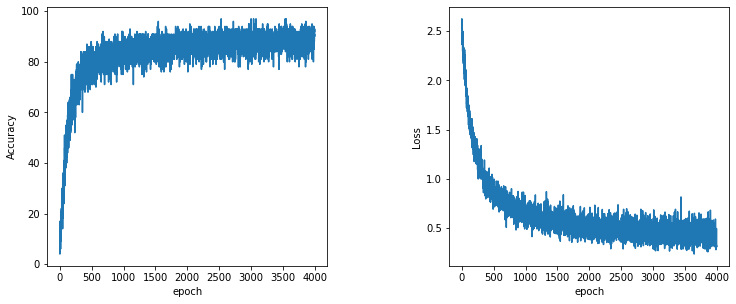

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2) # Plotting Loss and Accuracy

fig.tight_layout(pad=3.0)
fig.set_size_inches(12, 5)
ax1.plot(acc)
ax1.set(xlabel='epoch', ylabel='Accuracy')
ax2.plot(cost)
ax2.set(xlabel='epoch', ylabel='Loss')